# **Create a Data Frame called 'data_base'**

In [27]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

wd = os.getcwd() #working directory

In [28]:
fname_txt = 'ConjunctionData.csv'
fpath_txt = os.path.join(wd, fname_txt)

data_base = pd.read_csv(fpath_txt)
data_base["log_flux0"] = np.log10(data_base["Poes0 Flux"])
data_base["log_flux90"] = np.log10(data_base["Poes90 Flux"])

#replace inf's with NaN:
data_base.replace([np.inf, -np.inf], np.nan, inplace=True)
#drop every row where a NaN, inf exists: see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
data_base.dropna(axis=0, inplace=True)

data_base

,Poes0 Flux,Poes90 Flux,Poes0 PA,Poes90 PA,L,MLT,AE,AE3hrstar max,AE3hrstar min,AE3hrstar avg,...,AEsub28,AEsub29,AEsub30,AEsub31,AEsub32,AEsub33,AEsub34,AEsub35,log_flux0,log_flux90
0,161.290314,12540.322266,6.868389,14.291378,2.301067,20.368684,65,113,43,75.666667,...,76,74,49,43,45,46,51,58,2.207608,4.098309
1,161.290314,12540.322266,6.801297,14.203783,2.309885,20.364243,65,113,43,75.666667,...,76,74,49,43,45,46,51,58,2.207608,4.098309
2,241.935486,13185.483398,6.737389,14.116122,2.318573,20.359815,65,113,43,75.666667,...,76,74,49,43,45,46,51,58,2.383700,4.120096
3,80.645157,19153.226562,6.480861,13.766443,2.355340,20.342046,65,113,43,75.666667,...,76,74,49,43,45,46,51,58,1.906578,4.282242
4,80.645157,30282.257812,6.353932,13.592029,2.373626,20.333060,65,113,43,75.666667,...,76,74,49,43,45,46,51,58,1.906578,4.481188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12546,161.290314,31572.580078,175.914358,169.938719,2.838628,9.615955,124,235,80,164.611111,...,155,148,182,185,186,198,183,167,2.207608,4.499310
12547,80.645157,31572.580078,175.963165,170.019514,2.853086,9.618258,124,235,80,164.611111,...,155,148,182,185,186,198,183,167,1.906578,4.499310
12548,80.645157,36411.289062,176.011635,170.100833,2.868777,9.620536,124,235,80,164.611111,...,155,148,182,185,186,198,183,167,1.906578,4.561236
12549,161.290314,40282.257812,176.059442,170.180498,2.883683,9.622787,124,235,80,164.611111,...,155,148,182,185,186,198,183,167,2.207608,4.605114


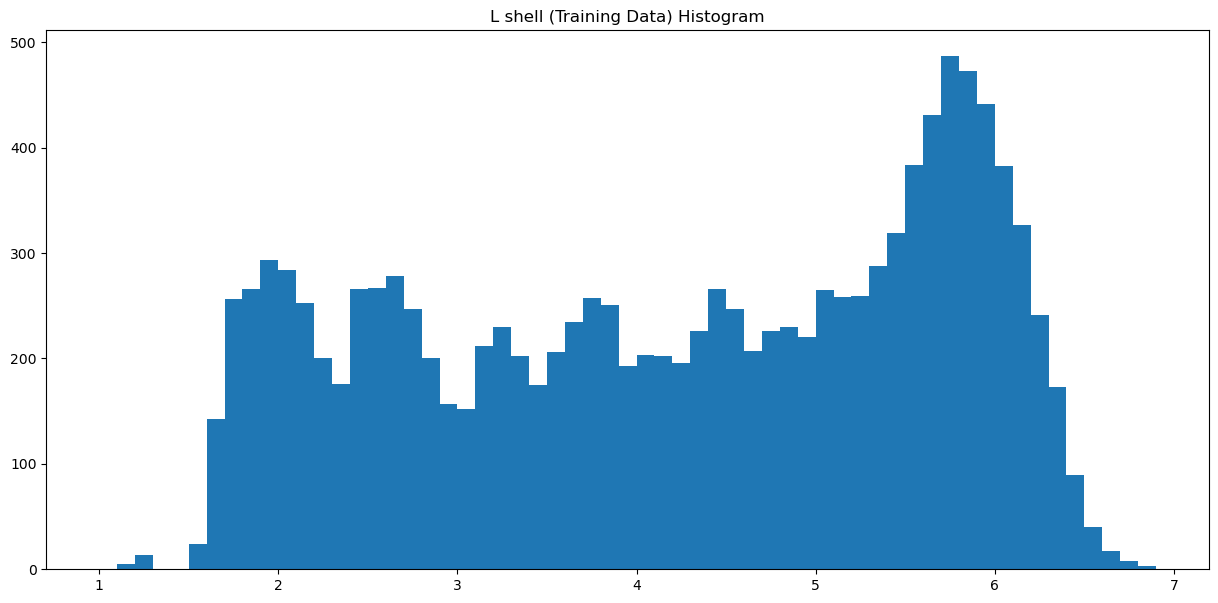

In [7]:
# Creating plot to show the spread in L shell (trying to identify weaknesses in the training data)
fig = plt.figure(figsize =(15, 7))
plt.hist(data_base["L"].values, bins=np.arange(1,7,0.1))
plt.title("L shell (Training Data) Histogram")
plt.show()

# **Establish Train and Test data**
Create arrays: X_data(inputs), y_data(outputs)

In [8]:
# Create 5 different dataframes for 5 different model (runs)
# 1. POES90, L, MLT
# 2. POES90, L, MLT, AE
# 3. POES90, POES0, L, MLT
# 4. POES90, POES0, L, MLT, AE
# 5. POES90, POES0, L, MLT, AE, AEts


X_data1 = data_base[["log_flux90","L","MLT"]].values
X_data2 = data_base[["log_flux90","L","MLT", "AEsub0"]].values
X_data3 = data_base[["log_flux90","log_flux0","L","MLT"]].values
X_data4 = data_base[["log_flux90","log_flux0","L","MLT", "AEsub0"]].values
X_data5 = data_base[["log_flux90", "log_flux0","L","MLT","AEsub0","AEsub1","AEsub2","AEsub3",
                  "AEsub4","AEsub5","AEsub6","AEsub7","AEsub8","AEsub9","AEsub10","AEsub11",
                  "AEsub12","AEsub13","AEsub14","AEsub15","AEsub16","AEsub17","AEsub18",
                  "AEsub19","AEsub20","AEsub21","AEsub22","AEsub23","AEsub24","AEsub25",
                  "AEsub26","AEsub27","AEsub28","AEsub29","AEsub30","AEsub31","AEsub32",
                  "AEsub33","AEsub34","AEsub35"]].values

y_data=data_base[["C","N"]].values

test_size = 0.3

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data1, y_data, test_size=test_size, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data, test_size=test_size, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_data3, y_data, test_size=test_size, random_state=0)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_data4, y_data, test_size=test_size, random_state=0)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_data5, y_data, test_size=test_size, random_state=0)
# use the random_state argument to make sure results are deterministic


# **Complete GridSearchCV  and Train MLPRegressor**

## CSVGridSearch1
## Build and train a the MLP Model with cross validation

In [9]:
scalerX1 = StandardScaler().fit(X_train1)
X_train1 = scalerX1.transform(X_train1)
X_test1 = scalerX1.transform(X_test1)

regr_ann1 = MLPRegressor(random_state = 0, solver='sgd', activation='relu',max_iter=1000,learning_rate_init= 0.001,
                        learning_rate = 'adaptive',hidden_layer_sizes = (15,15)) # random_state argument to make results deterministic

#instead of training the model as-is, let's use GridSearchCV to:
# 1) explore different hyperparameter - in particular, hidden layer sizes
# 2) perform cross validation
# resource: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#MLPRegressor has two hidden layers, so their size is specified using an array of length 2 via the hidden_layer_sizes parameter
hidden_layer_sizes_hyperspace = [(10,10), (50,50), (90,90), (100,100)]
activation_hyperspace = ['relu', 'tanh']
solver_hyperspace = ['sgd', 'adam']

grid = GridSearchCV(estimator = regr_ann1,
                    param_grid = {'hidden_layer_sizes': hidden_layer_sizes_hyperspace, 'activation': activation_hyperspace,
                                  'solver':solver_hyperspace},
                    cv = 3, verbose = 2)


grid.fit(X_train1,y_train1) #start the grid search process
y_pred_ann1 = grid.predict(X_test1) #automatically uses the best cross validation result and optimal hyperparameters

#look at the cross validation results:
# use pandas to generate dataframes from dictionaries
df = pd.DataFrame.from_dict(grid.cv_results_)
display(df)

#the columns 'split0_test_score, split1_test_score, etc.' are the different K folds of the CV process
#the rows are different hyperspace parameters

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   5.3s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=  10.0s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   6.3s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total time=   9.9s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total t

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.732564,0.101649,0.001308,0.000865,relu,"(10, 10)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.817533,0.824286,0.825353,0.822391,0.003462,16
1,0.897917,0.127819,0.001116,0.000035,relu,"(10, 10)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.843568,0.840263,0.830722,0.838184,0.005446,14
2,7.183413,2.018228,0.005044,0.003197,relu,"(50, 50)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.858412,0.857750,0.846882,0.854348,0.005286,11
3,8.804674,3.666123,0.005612,0.005291,relu,"(50, 50)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.879601,0.891724,0.863227,0.878184,0.011677,6
4,9.126443,1.323171,0.002767,0.000265,relu,"(90, 90)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.862721,0.857609,0.848320,0.856217,0.005961,9
5,10.662942,1.150518,0.002655,0.000204,relu,"(90, 90)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.898661,0.901476,0.888415,0.896184,0.005612,1
6,8.120822,0.802833,0.002817,0.000357,relu,"(100, 100)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.861256,0.854079,0.850061,0.855132,0.004631,10
7,11.014345,4.641961,0.003997,0.001483,relu,"(100, 100)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.871991,0.891228,0.877335,0.880185,0.008108,5
8,0.959224,0.043404,0.001119,0.000117,tanh,"(10, 10)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.836496,0.832698,0.830598,0.833264,0.002441,15
9,1.575823,0.044261,0.000958,0.000178,tanh,"(10, 10)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.865007,0.870885,0.866279,0.867390,0.002525,7


## CSVGridSearch2
## Build and train a the MLP Model with cross validation

In [10]:
scalerX2 = StandardScaler().fit(X_train2)
X_train2 = scalerX2.transform(X_train2)
X_test2 = scalerX2.transform(X_test2)

regr_ann2 = MLPRegressor(random_state = 0, solver='sgd', activation='relu',max_iter=1000,learning_rate_init= 0.001,
                        learning_rate = 'adaptive',hidden_layer_sizes = (15,15),verbose=False ) # random_state argument to make results deterministic

#MLPRegressor has two hidden layers, so their size is specified using an array of length 2 via the hidden_layer_sizes parameter
hidden_layer_sizes_hyperspace = [(10,10), (50,50), (90,90), (100,100)]
grid2 = GridSearchCV(estimator = regr_ann2,
                    param_grid = {'hidden_layer_sizes': hidden_layer_sizes_hyperspace, 'activation': activation_hyperspace,
                                  'solver':solver_hyperspace},
                    cv = 3, verbose = 2)

grid2.fit(X_train2,y_train2) #start the grid search process
y_pred_ann2 = grid2.predict(X_test2) #automatically uses the best cross validation result and optimal hyperparameters

#look at the cross validation results:
# use pandas to generate dataframes from dictionaries
df2 = pd.DataFrame.from_dict(grid2.cv_results_)
display(df2)

#the columns 'split0_test_score, split1_test_score, etc.' are the different K folds of the CV process
#the rows are different hyperspace parameters

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   5.7s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   4.5s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   6.1s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total time=   5.3s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total t

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.708616,0.074467,0.000791,0.000211,relu,"(10, 10)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.832784,0.831301,0.835627,0.833237,0.001795,16
1,0.775666,0.019155,0.000794,0.000192,relu,"(10, 10)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.840851,0.834918,0.841921,0.839230,0.003080,15
2,5.436864,0.690024,0.002116,0.000222,relu,"(50, 50)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.860125,0.859073,0.855000,0.858066,0.002210,13
3,8.926629,2.672819,0.001809,0.000167,relu,"(50, 50)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.882725,0.893965,0.884338,0.887009,0.004963,6
4,9.849675,1.748405,0.005268,0.002109,relu,"(90, 90)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.861664,0.865317,0.852618,0.859866,0.005338,10
5,10.594329,1.664439,0.003313,0.000717,relu,"(90, 90)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.909552,0.900445,0.891358,0.900452,0.007427,1
6,7.405691,0.764034,0.003764,0.001432,relu,"(100, 100)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.864617,0.863380,0.856392,0.861463,0.003621,9
7,8.882054,1.742579,0.007664,0.003345,relu,"(100, 100)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.911343,0.888064,0.891476,0.896961,0.010265,2
8,0.756068,0.024986,0.000697,0.000052,tanh,"(10, 10)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.849060,0.848380,0.843900,0.847113,0.002289,14
9,1.674425,0.062974,0.001042,0.000144,tanh,"(10, 10)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.877563,0.881963,0.880936,0.880154,0.001879,7


## CSVGridSearch3
## Build and train a the MLP Model with cross validation

In [11]:


scalerX3 = StandardScaler().fit(X_train3)
X_train3 = scalerX3.transform(X_train3)
X_test3 = scalerX3.transform(X_test3)

regr_ann3 = MLPRegressor(random_state = 0, solver='sgd', activation='relu',max_iter=1000,learning_rate_init= 0.001,
                        learning_rate = 'adaptive',hidden_layer_sizes = (15,15),verbose=False ) # random_state argument to make results deterministic



grid3 = GridSearchCV(estimator = regr_ann3,
                    param_grid = {'hidden_layer_sizes': hidden_layer_sizes_hyperspace, 'activation': activation_hyperspace,
                                  'solver':solver_hyperspace},
                    cv = 3, verbose = 2)

grid3.fit(X_train3,y_train3) #start the grid search process
y_pred_ann3 = grid3.predict(X_test3) #automatically uses the best cross validation result and optimal hyperparameters

#look at the cross validation results:
# use pandas to generate dataframes from dictionaries
df3 = pd.DataFrame.from_dict(grid3.cv_results_)
display(df3)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   7.5s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   7.0s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   6.9s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total time=   5.2s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total t

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.639394,0.065237,0.000691,0.000106,relu,"(10, 10)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.860187,0.849755,0.844326,0.851423,0.006581,16
1,0.792956,0.106262,0.000990,0.000005,relu,"(10, 10)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.860384,0.859003,0.851744,0.857044,0.003789,14
2,7.120265,0.284616,0.001801,0.000118,relu,"(50, 50)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.891715,0.879041,0.870062,0.880273,0.008882,8
3,5.361243,0.800921,0.004743,0.003147,relu,"(50, 50)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.905655,0.895613,0.889215,0.896827,0.006766,3
4,8.967437,1.122794,0.003216,0.000208,relu,"(90, 90)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.890354,0.883769,0.867669,0.880597,0.009529,7
5,6.805113,1.450238,0.003585,0.001655,relu,"(90, 90)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.906380,0.903831,0.885608,0.898607,0.009250,2
6,9.618688,1.192193,0.004463,0.001905,relu,"(100, 100)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.890228,0.879422,0.868814,0.879488,0.008742,9
7,7.998899,1.513243,0.004832,0.002275,relu,"(100, 100)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.907965,0.899695,0.896319,0.901326,0.004892,1
8,0.583570,0.006495,0.001028,0.000071,tanh,"(10, 10)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.864968,0.849917,0.848801,0.854562,0.007372,15
9,0.937636,0.019879,0.001021,0.000211,tanh,"(10, 10)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.879804,0.868634,0.860410,0.869616,0.007948,10


## CSVGridSearch4
## Build and train a the MLP Model with cross validation

In [12]:
scalerX4 = StandardScaler().fit(X_train4)
X_train4 = scalerX4.transform(X_train4)
X_test4 = scalerX4.transform(X_test4)

regr_ann4 = MLPRegressor(random_state = 0, solver='sgd', activation='relu',max_iter=1000,learning_rate_init= 0.001,
                        learning_rate = 'adaptive',hidden_layer_sizes = (15,15),verbose=False ) # random_state argument to make results deterministic



grid4 = GridSearchCV(estimator = regr_ann4,
                    param_grid = {'hidden_layer_sizes': hidden_layer_sizes_hyperspace, 'activation': activation_hyperspace,
                                  'solver':solver_hyperspace},
                    cv = 3, verbose = 2)

grid4.fit(X_train4,y_train4) #start the grid search process
y_pred_ann4 = grid4.predict(X_test4) #automatically uses the best cross validation result and optimal hyperparameters

#look at the cross validation results:
# use pandas to generate dataframes from dictionaries
df4 = pd.DataFrame.from_dict(grid4.cv_results_)
display(df4)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   7.7s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   8.3s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   7.1s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total time=   7.4s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total t

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.839121,0.081405,0.000973,0.000104,relu,"(10, 10)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.869047,0.858121,0.850284,0.859151,0.007694,16
1,0.812915,0.164437,0.000728,0.000102,relu,"(10, 10)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.877622,0.871730,0.854062,0.867805,0.010011,14
2,7.683576,0.455292,0.001834,0.000271,relu,"(50, 50)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.891278,0.880825,0.870396,0.880833,0.008525,9
3,6.983039,0.406205,0.009417,0.008952,relu,"(50, 50)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.902487,0.899051,0.889602,0.897047,0.005448,4
4,10.083382,0.612768,0.005528,0.003520,relu,"(90, 90)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.896061,0.886670,0.877038,0.886589,0.007767,7
5,9.081504,0.327189,0.002483,0.000099,relu,"(90, 90)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.911127,0.916276,0.905479,0.910961,0.004409,1
6,9.734680,0.670853,0.003474,0.000521,relu,"(100, 100)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.892924,0.884784,0.875516,0.884408,0.007112,8
7,8.238140,1.935851,0.003859,0.000889,relu,"(100, 100)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.908952,0.910465,0.892484,0.903967,0.008143,2
8,0.710152,0.055996,0.000975,0.000204,tanh,"(10, 10)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.868476,0.866884,0.851159,0.862173,0.007815,15
9,0.970427,0.173411,0.001083,0.000233,tanh,"(10, 10)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.891261,0.871092,0.865114,0.875822,0.011186,10


## CSVGridSearch5
## Build and train a the MLP Model with cross validation

In [13]:
scalerX5 = StandardScaler().fit(X_train5)
X_train5 = scalerX5.transform(X_train5)
X_test5 = scalerX5.transform(X_test5)

regr_ann5 = MLPRegressor(random_state = 0, solver='sgd', activation='relu',max_iter=1000,learning_rate_init= 0.001,
                        learning_rate = 'adaptive',hidden_layer_sizes = (15,15),verbose=False ) # random_state argument to make results deterministic



grid5 = GridSearchCV(estimator = regr_ann5,
                    param_grid = {'hidden_layer_sizes': hidden_layer_sizes_hyperspace, 'activation': activation_hyperspace,
                                  'solver':solver_hyperspace},
                    cv = 3, verbose = 2)

grid5.fit(X_train5,y_train5) #start the grid search process
y_pred_ann5 = grid5.predict(X_test5) #automatically uses the best cross validation result and optimal hyperparameters

#look at the cross validation results:
# use pandas to generate dataframes from dictionaries
df5 = pd.DataFrame.from_dict(grid5.cv_results_)
display(df5)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=  13.2s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=  13.1s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=  10.3s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total time=  11.1s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total t

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.040818,0.035122,0.000887,0.000301,relu,"(10, 10)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.868782,0.859162,0.848762,0.858902,0.008175,16
1,1.093271,0.203013,0.001036,0.000298,relu,"(10, 10)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.874085,0.864058,0.859751,0.865965,0.006005,15
2,12.191096,1.343355,0.001946,0.000156,relu,"(50, 50)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.893901,0.883476,0.865347,0.880908,0.011798,12
3,12.357820,1.487938,0.003457,0.001376,relu,"(50, 50)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.927375,0.924327,0.885001,0.912234,0.019297,4
4,15.022880,1.526748,0.003954,0.001525,relu,"(90, 90)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.908776,0.889606,0.877729,0.892037,0.012791,8
5,10.795264,4.011002,0.005010,0.002384,relu,"(90, 90)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.942287,0.921911,0.900791,0.921663,0.016942,3
6,15.486995,0.159603,0.003244,0.000306,relu,"(100, 100)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.910423,0.897603,0.885258,0.897761,0.010274,7
7,8.979958,0.547191,0.003910,0.000794,relu,"(100, 100)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.932459,0.931898,0.920898,0.928418,0.005323,1
8,1.093126,0.003626,0.001041,0.000220,tanh,"(10, 10)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.878652,0.871137,0.859823,0.869870,0.007739,14
9,1.360536,0.065180,0.001197,0.000307,tanh,"(10, 10)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.892019,0.888576,0.865341,0.881979,0.011848,11


In [14]:
#look at the cross validation results:

print(grid.best_params_)
print(grid.best_score_)

print(grid2.best_params_)
print(grid2.best_score_)

print(grid3.best_params_)
print(grid3.best_score_)

print(grid4.best_params_)
print(grid4.best_score_)

print(grid5.best_params_)
print(grid5.best_score_)

# use pandas to generate dataframes from dictionaries
pd.DataFrame.from_dict(y_pred_ann5)

from sklearn import metrics
print('R2: ' ,metrics.r2_score(y_test5, y_pred_ann5))
print('R2: ' ,metrics.r2_score(y_train5, grid5.predict(X_train5)))

{'activation': 'relu', 'hidden_layer_sizes': (90, 90), 'solver': 'adam'}
0.8961841796240174
{'activation': 'relu', 'hidden_layer_sizes': (90, 90), 'solver': 'adam'}
0.9004515871129556
{'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}
0.9013261127757352
{'activation': 'relu', 'hidden_layer_sizes': (90, 90), 'solver': 'adam'}
0.9109607464051486
{'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}
0.9284184676830582
R2:  0.9443878168933517
R2:  0.9618874998968121


# **2014 Validation**
## Loading POES data for 2014 (2sec cadence), NOT conjunction based

In [19]:
poes_name_txt = 'POES2014.csv'
poes_path_txt = os.path.join(wd, poes_name_txt)
poes_base  = pd.read_csv(poes_path_txt)
poes_base["log_flux0"] = np.log10(poes_base['Poes0 Flux']+1) # Plus 1 to avoid inf
poes_base["log_flux90"] = np.log10(poes_base['Poes90 Flux']+1) # Plus 1 to avoid inf
X_poes=poes_base[["log_flux0", "log_flux90","L","MLT","AEsub0","AEsub1","AEsub2","AEsub3",
                  "AEsub4","AEsub5","AEsub6","AEsub7","AEsub8","AEsub9","AEsub10","AEsub11",
                  "AEsub12","AEsub13","AEsub14","AEsub15","AEsub16","AEsub17","AEsub18",
                  "AEsub19","AEsub20","AEsub21","AEsub22","AEsub23","AEsub24","AEsub25",
                  "AEsub26","AEsub27","AEsub28","AEsub29","AEsub30","AEsub31","AEsub32",
                  "AEsub33","AEsub34","AEsub35"]].values

#y_pred_poes = grid5.predict(scalerX5.transform(X_poes))
#Save y_pred_poes for the predicted C and N coefficients 

# Error Plots (i.e. REC Curve, Model Fits)


In [20]:
#REC Curve
def rec(m,n,tol):
  if type(m)!='numpy.ndarray':
    m=np.array(m)
  if type(n)!='numpy.ndarray':
    n=np.array(n)
  l=m.size
  percent = 0
  for i in range(l):
    if np.abs((m[i]-n[i])/n[i])<=tol:
      percent+=1
  return 100*(percent/l)

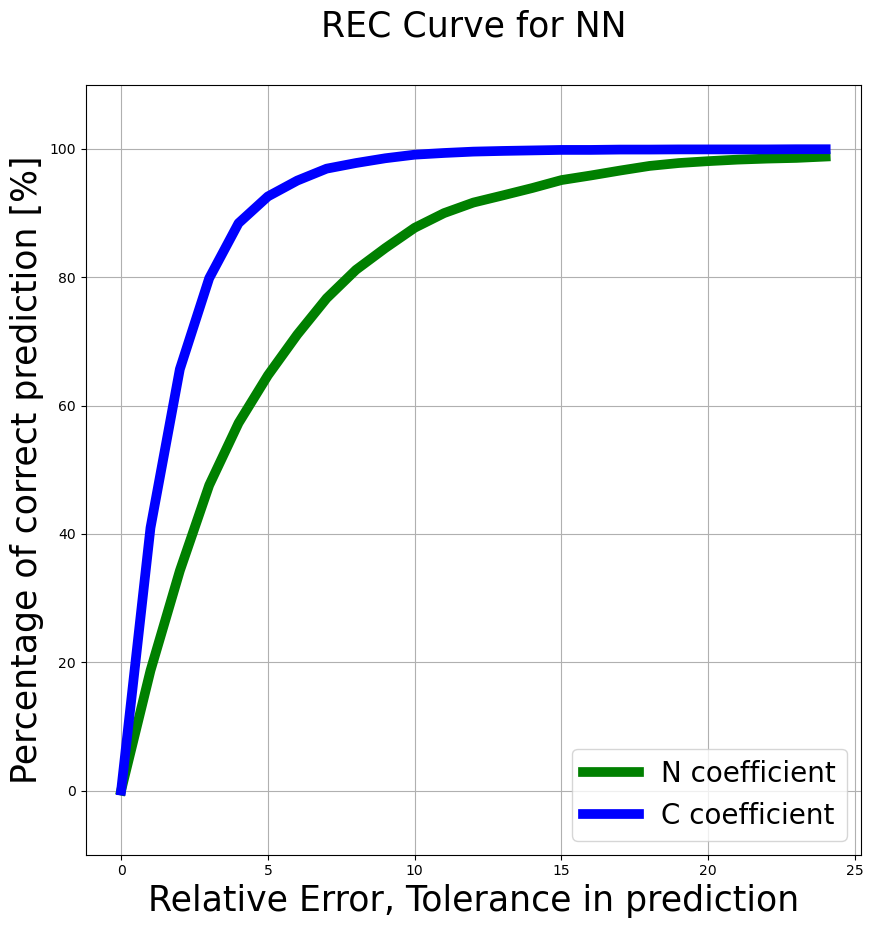

In [21]:
tol_max = 25
rec_SVR = []
rec2_SVR = []

for i in range(tol_max):
  rec_SVR.append(rec(y_pred_ann5[:,1], y_test5[:,1],0.01*i))
  rec2_SVR.append(rec(y_pred_ann5[:,0], y_test5[:,0],0.01*i))

plt.figure(figsize=(10,10))
plt.title('REC Curve for NN\n', fontsize = 25)
plt.xlabel('Relative Error, Tolerance in prediction',fontsize = 25)
plt.ylabel('Percentage of correct prediction [%]',fontsize = 25)
plt.ylim(-10,110)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max), rec_SVR, 'g', label='N coefficient' ,linewidth=7.0)
plt.plot(range(tol_max), rec2_SVR, 'b',label='C coefficient',linewidth=7.0)
plt.legend(fontsize=20)
plt.show()

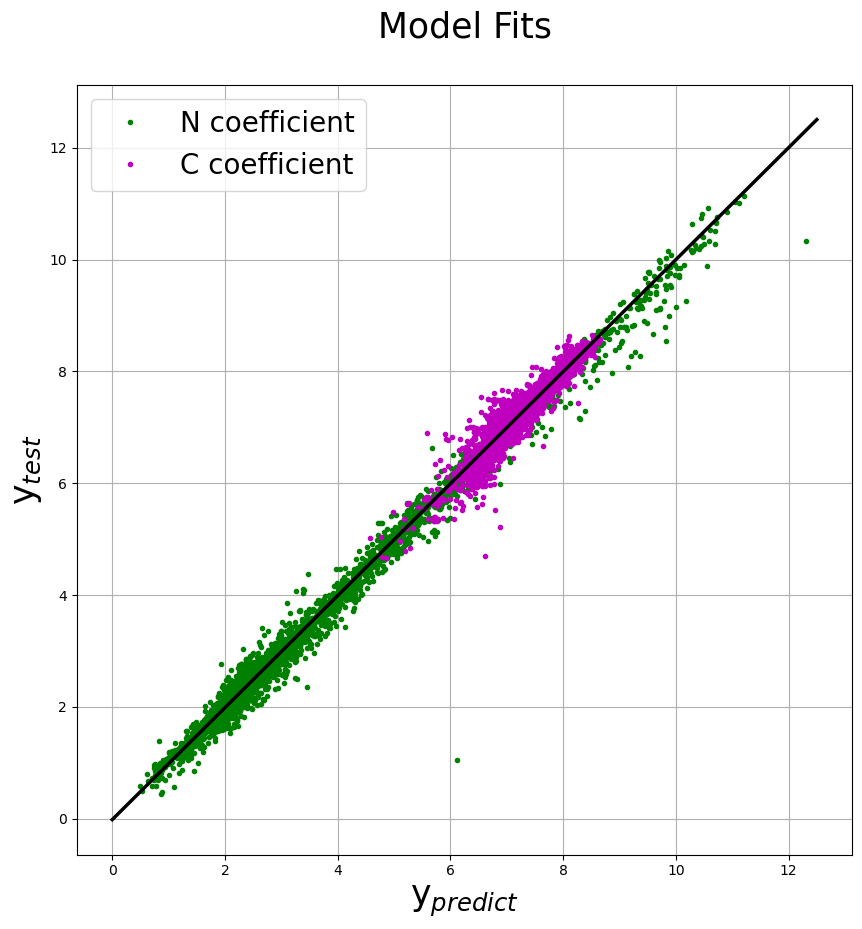

In [26]:
plt.figure(figsize=(10,10))
plt.title('Model Fits\n', fontsize=25)
plt.xlabel('y$_{predict}$', fontsize=25)
plt.ylabel('y$_{test}$', fontsize=25)
plt.grid(True)
plt.plot(y_pred_ann5[:,1],y_test5[:,1], 'g.', lw=2.5,label='N coefficient')
plt.plot(y_pred_ann5[:,0],y_test5[:,0], 'm.', lw=2.5,label='C coefficient')
y_pred_ann_tot = np.append(y_pred_ann5[:,1], y_pred_ann5[:,0])
y_test_ann_tot = np.append(y_test5[:,1], y_test5[:,0])
y_pred_ann_tot =y_pred_ann5[:,0]
y_test_ann_tot = y_test5[:,0]
# Plot regression line
b, a = np.polyfit(y_pred_ann_tot,y_test_ann_tot, deg=1)
# Create sequence of 100 numbers from 0 to 100
xseq = np.linspace(0, 12.5, num=100)
plt.plot(xseq, a + b * xseq, color="k", lw=2.5);

plt.legend(fontsize=20)
plt.show()